# Искусственные нейронные сети

В данной лекции мы рассмотрим как применяется математический аппарат искусственный нейронных сетей (artifical neural networks) в задаче распознавания рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/).

Для работы с нейронными сетями будем использовать библиотеку [keras](https://keras.io/).

Начнем с загрузки набора данных и его описания.

In [65]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
n = X_train.shape[0]
m = X_train.shape[1]*X_train.shape[2]
nclasses = 10

Каждая цифра представляет собой черно белое изображение с разрешением 28x28. Вектор признаков, таким образом, имеет размерность $28 \cdot 28= 784$. Каждый признак представляет собой интенсивность конкретного пикселя.

Целевая переменная принимает одно из 10 значений $0, 1, \dots, 9$.

Визуализируем несколько случайных примеров из обучающей выборки.

Populating the interactive namespace from numpy and matplotlib


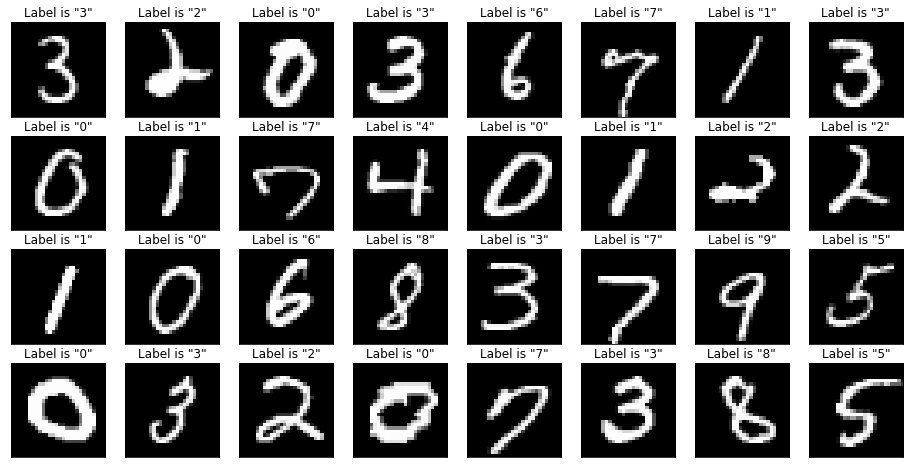

In [2]:
%pylab inline

nrows = 4
ncols = 8
_, ax = plt.subplots(nrows, ncols, figsize=(2*ncols, 2*nrows))
for k, nsample in enumerate(np.random.randint(low=0, high=n, size=nrows*ncols)):
    i = k // ncols
    j = k % ncols
    ax[i, j].imshow(X_train[nsample], cmap='gray')
    ax[i, j].set_title('Label is "{}"'.format(y_train[nsample]))
    ax[i, j].xaxis.set_visible(False)
    ax[i, j].yaxis.set_visible(False)

## Искуственный нейрон

![alt text](fig/neuron.png "Модель искусственного нейрона")

Таким образом видно, что искуственный нейрон реализует отображение вида
$$
    h_w(x) = \varphi(w_0 + \sum\limits_{i=1}^{m} w_i x_i)
$$

В случае, если активационная функция $\varphi$ предсталвяет собой сигмоиду, то мы получаем модель Логистической регрессии.



## Алгоритм обратного распространения ошибки

По аналогии с методом градиентного спуска для обучения модели логистической регресси, для для обучения модели искуственного нейрона используется алгоритм обратного распростарнения ошибки.

![](fig/single-backprop.png)

Обозначим функцию вычисления ошибки (аналог функции потерь) как $E$. Тогда для вычисления вклада каждого веса $w_i$ в величину ошибки нам необходимо вычислить частные производные, используя правило вычисления производной для сложной функции
$$
\frac{\partial E}{\partial w_i} = \frac{d E}{d o}\frac{d\varphi}{dz}\frac{\partial z}{\partial w_i}.
$$

Последняя производная может быть легко представлена в виде
$$
\delta_i = \frac{\partial z}{\partial w_i} = \frac{\partial}{\partial w_i}\left(\sum\limits_{i=o}^{m}x_iw_i\right) = x_i.
$$

В случае, если сигмоида используется в качестве функции активации $\varphi(z) = (1 + e^{-z})^{-1}$, то ее производную можно представить следующим образом
$$
\frac{d \varphi}{dz} = \varphi(z)(1 - \varphi(z)).
$$

И если рассмотреть в качестве функции вычисления ошибки половину квадрата ошибки $E = \frac{1}{2}(\hat o - o)^2$, то мы получим выражение для величины вклада каждого из весов $w_i$ в ошибку $e$
$$
\delta_i = (\hat o - o)\varphi'(z)x_i.
$$

Далее мы можем использовать данные значения для обновления весов нейрона.
$$
\hat w_i = w_i - \alpha \delta_i.
$$
Здесь $\alpha$ - скорость обучения.

## Нейронная сеть

Одной из важнейших особенностей использования математической модели искуственного нейрона является возможность объединять их в нейронные сети. 

![](fig/2layers.png)

На рисунке предтавленна нейорнная сеть из двух слоев, один из которых называется входным, а другой - выходным.

In [3]:
# convert class vectors to binary class matrices
import keras.utils

y_train_enc = keras.utils.to_categorical(y_train, nclasses)
y_test_enc = keras.utils.to_categorical(y_test, nclasses)

In [66]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(m, ),
                name="Input",
                ))
model.add(Dense(units=36,
                name="Hidden",
                ))
model.add(Dense(units=nclasses,
                activation='softmax',
                name="Output",
                ))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],
              )

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden (Dense)               (None, 36)                28260     
_________________________________________________________________
Output (Dense)               (None, 10)                370       
Total params: 28,630
Trainable params: 28,630
Non-trainable params: 0
_________________________________________________________________


In [17]:
train_history = model.fit(X_train.reshape(-1, m), y_train_enc,
                          validation_data=(X_test.reshape(-1, m), y_test_enc),
                          shuffle=True,
                          epochs=30,
                          batch_size=32
                          )

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3788 - acc: 0.8938 - val_loss: 0.2931 - val_acc: 0.9182
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2899 - acc: 0.9194 - val_loss: 0.2923 - val_acc: 0.9195
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2788 - acc: 0.9221 - val_loss: 0.2777 - val_acc: 0.9241
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2720 - acc: 0.9248 - val_loss: 0.2764 - val_acc: 0.9239
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2682 - acc: 0.9247 - val_loss: 0.2822 - val_acc: 0.9187
Epoch 6/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2652 - acc: 0.9255 - val_loss: 0.2787 - val_acc: 0.9237
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2619 - acc: 0.9262 - val_loss: 0.2816 - val_acc: 0.9217
Epoch 8/30
1875/1875 [==============================] - 3s 1ms

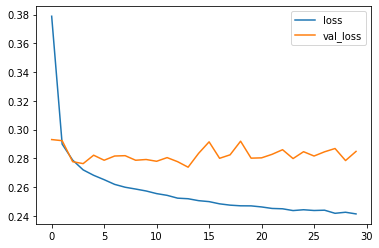

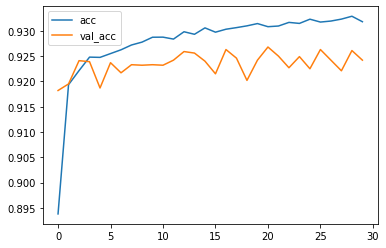

In [18]:
import pandas as pd

history = pd.DataFrame(data=train_history.history)
history[['loss', 'val_loss']].plot()
history[['acc', 'val_acc']].plot()

## Матричное представление нейронной сети




In [83]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-12.32.19-PM.png", width=900)

In [84]:

Image(url="https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-12.53.07-PM.png", width=900)

## Матричное представление нейронной сети

Рассмотрим сеть, состоящую из входного, одного скрытого и выходного слоев.

Обозначим входные признаки как $x_{ij}, i = \overline{1, n}, j=\overline{1, m}$. Пусть в $k$-m слое имеется $j_{k}$ нейронов, тогда веса для $k$-го слоя обозначим как $w^{(k)}_{i_{k}j_{k}}$. Отметим, что $m = m_{0}$.
$$
z^{(1)}_{ij_{1}} = \sum\limits_{l=0}^{m_{0}} x_{il}w^{(1)}_{lj_{1}} \\
a^{(1)}_{ij_{1}} = g_1(z^{(1)}_{ij_{1}}) \\
z^{(2)}_{ij_{2}} = \sum\limits_{l=0}^{m_{1}} a^{(1)}_{il}w^{(2)}_{lj_{2}} \\
a^{(2)}_{ij_{2}} = g_2(z^{(2)}_{ij_{2}}) \\
$$

Представим эти соотношения в матричном виде
$$
Z^{(k)} = W^{(k)} A^{(k-1)}, A^{0} = X \\
A^{(k)} = g_k(Z^{(k)})
$$


## Подбора гиперпараметров


In [69]:
def fit_and_plot(model, x_train, y_train, x_test, y_test, epochs=30, batch_size=32):
    train_history = model.fit(x_train, y_train,
                              validation_data=(x_test, y_test),
                              shuffle=True,
                              epochs=epochs,
                              batch_size=batch_size,
                              )
    
    history = pd.DataFrame(data=train_history.history)
    history[['loss', 'val_loss']].plot()
    history[['acc', 'val_acc']].plot()

### Несколько скрытых слоев

In [45]:
model = Sequential()
model.add(
    Input(shape=(m, ),
          name="Input",
          ))
model.add(
    Dense(units=100,
          name="Hidden1",
          ))
model.add(
    Dense(units=30,
          name="Hidden2",
          ))
model.add(
    Dense(units=nclasses,
          activation='softmax',
          name="Output",
          ))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam', 
    metrics=['acc'],
    )

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden1 (Dense)              (None, 100)               78500     
_________________________________________________________________
Hidden2 (Dense)              (None, 30)                3030      
_________________________________________________________________
Output (Dense)               (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3675 - acc: 0.8939 - val_loss: 0.3005 - val_acc: 0.9174
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3044 - acc: 0.9142 - val_loss: 0.2947 - val_acc: 0.9159
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - acc: 0.9172 - val_loss: 0.2943 - val_acc: 0.9224
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2874 - acc: 0.9180 - val_loss: 0.2928 - val_acc: 0.9222
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2829 - acc: 0.9208 - val_loss: 0.3012 - val_acc: 0.9158
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2790 - acc: 0.9218 - val_loss: 0.2971 - val_acc: 0.9198
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2767 - acc: 0.9228 - val_loss: 0.2924 - val_acc: 0.9210
Epoch 8/30
1875/1875 [==============================] - 4s 2ms

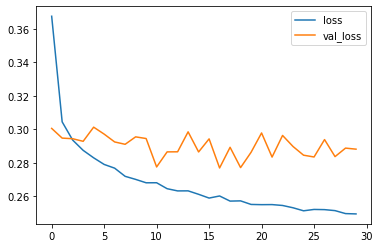

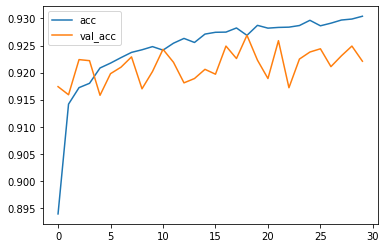

In [46]:
fit_and_plot(model, X_train.reshape(-1, m), y_train_enc, X_test.reshape(-1, m), y_test_enc)

## Функции активации


### Логистическая функция

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

### Rectified Linear Unit (ReLU)
$$
relu(x) = \max(x, 0)
$$

### Гиперболический тангенс
$$
\tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$

### Softplus
$$
softplus(x) = \log(e^x + 1)
$$

### Exponential linear unit (ELU)
$$
elu(x) = \begin{cases}
x, & x > 0 \\
\alpha * ( e^x - 1), & x < 0
\end{cases}
$$

### Scaled exponential linear unit (SELU)
$$
selu(x) = \begin{cases}
s * x, & x > 0 \\
s * \alpha * ( e^x - 1), & x < 0
\end{cases}
$$

$$
s = 1.05070098, \alpha = 1.67326324
$$


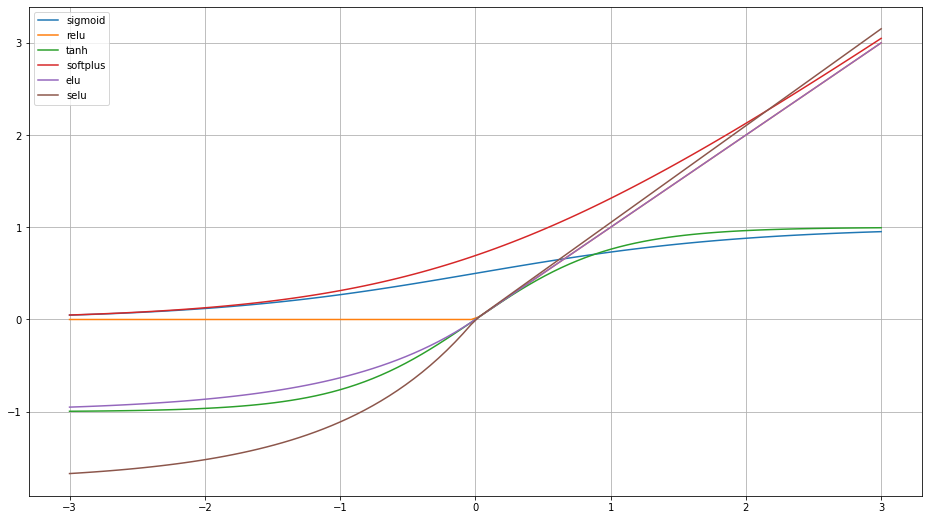

In [41]:
from keras import activations
import inspect

activation_funcs = [
    ('sigmoid', activations.sigmoid),
    ('relu', activations.relu),
    ('tanh', activations.tanh),
    ('softplus', activations.softplus),
    ('elu', activations.elu),
    ('selu', activations.selu),
]

#x = tf.constan(np.linspace(-3, 3, 100), dtype=tf.float32)
x = np.linspace(-3, 3, 100)

fig = plt.figure(figsize=(16, 9))
for name, func in activation_funcs:
    plot(x, func(x).numpy(), label=name)
plt.legend()
plt.grid()

### Один скрытый слой с ReLU активацией

In [23]:
model = Sequential()
model.add(Input(shape=(m, ),
                name="Input",
                ))
model.add(Dense(units=36,
                name="Hidden",
                activation="relu",
                ))
model.add(Dense(units=nclasses,
                name="Output",
                activation="softmax",
                ))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],
              )

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden (Dense)               (None, 36)                28260     
_________________________________________________________________
Output (Dense)               (None, 10)                370       
Total params: 28,630
Trainable params: 28,630
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3497 - acc: 0.9029 - val_loss: 0.2066 - val_acc: 0.9407
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1892 - acc: 0.9449 - val_loss: 0.1685 - val_acc: 0.9487
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1482 - acc: 0.9565 - val_loss: 0.1368 - val_acc: 0.9613
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1213 - acc: 0.9645 - val_loss: 0.1269 - val_acc: 0.9653
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1051 - acc: 0.9684 - val_loss: 0.1163 - val_acc: 0.9668
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0904 - acc: 0.9733 - val_loss: 0.1120 - val_acc: 0.9674
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0812 - acc: 0.9753 - val_loss: 0.1070 - val_acc: 0.9699
Epoch 8/30
1875/1875 [==============================] - 3s 2ms

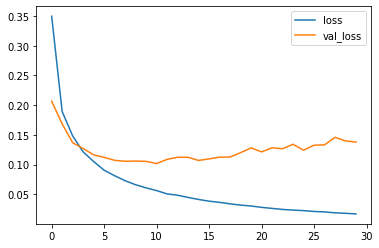

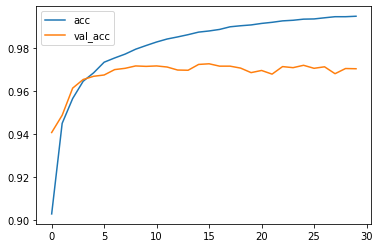

In [24]:
fit_and_plot(model, X_train.reshape(-1, m), y_train_enc, X_test.reshape(-1, m), y_test_enc)


### Сверточные нейронные сети
Convolutional neural networks (CNN)

In [87]:
Image(url="https://miro.medium.com/max/1400/1*CnNorCR4Zdq7pVchdsRGyw.png", width=900)

In [85]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

input_shape = (28, 28, 1)

model = Sequential()
model.add(
    Input(shape=input_shape,
          name="Input",
          ))
model.add(
    Conv2D(32,
           kernel_size=(3,3),
           activation="relu",
           ))
model.add(
  MaxPooling2D(pool_size=(2, 2),
               ))
model.add(
    Conv2D(64,
           kernel_size=(3,3),
           activation="relu",
           ))
model.add(
  MaxPooling2D(pool_size=(2, 2),
               ))
model.add(Flatten())
model.add(Dense(units=nclasses,
                name="Output",
                activation="softmax",
                ))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],
              )

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
Output (Dense)               (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

Epoch 1/30
469/469 [==============================] - 44s 94ms/step - loss: 0.2693 - acc: 0.9261 - val_loss: 0.0700 - val_acc: 0.9792
Epoch 2/30
469/469 [==============================] - 44s 93ms/step - loss: 0.0734 - acc: 0.9775 - val_loss: 0.0534 - val_acc: 0.9832
Epoch 3/30
469/469 [==============================] - 44s 94ms/step - loss: 0.0553 - acc: 0.9835 - val_loss: 0.0447 - val_acc: 0.9852
Epoch 4/30
469/469 [==============================] - 44s 94ms/step - loss: 0.0453 - acc: 0.9867 - val_loss: 0.0410 - val_acc: 0.9856
Epoch 5/30
469/469 [==============================] - 47s 101ms/step - loss: 0.0380 - acc: 0.9885 - val_loss: 0.0361 - val_acc: 0.9889
Epoch 6/30
469/469 [==============================] - 43s 92ms/step - loss: 0.0325 - acc: 0.9901 - val_loss: 0.0370 - val_acc: 0.9879
Epoch 7/30
469/469 [==============================] - 43s 92ms/step - loss: 0.0276 - acc: 0.9911 - val_loss: 0.0385 - val_acc: 0.9878
Epoch 8/30
469/469 [==============================] - 44s 93m

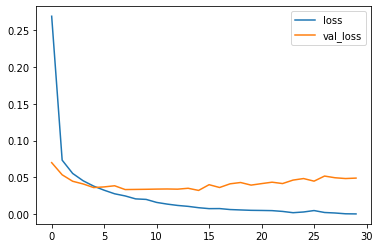

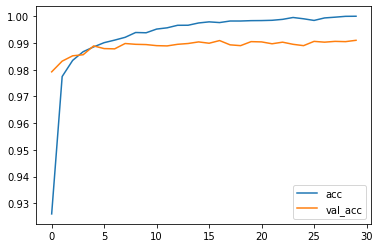

In [86]:
X_train_enc = np.expand_dims(X_train, -1)
X_test_enc = np.expand_dims(X_test, -1)
fit_and_plot(model, X_train_enc, y_train_enc, X_test_enc, y_test_enc, batch_size=128)

### Регуляризация НС методом выбивания (dropout)

In [90]:
Image(url="https://miro.medium.com/max/513/1*dEi_IkVB7IpkzZ-6H0Vpsg.png")

In [88]:
model = Sequential()
model.add(
    Input(shape=input_shape,
          name="Input",
          ))
model.add(
    Conv2D(32,
           kernel_size=(3,3),
           activation="relu",
           ))
model.add(
  MaxPooling2D(pool_size=(2, 2),
               ))
model.add(
    Conv2D(64,
           kernel_size=(3,3),
           activation="relu",
           ))
model.add(
  MaxPooling2D(pool_size=(2, 2),
               ))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=nclasses,
                name="Output",
                activation="softmax",
                ))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],
              )

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1600)              0         
_________________________________________________________________
Output (Dense)               (None, 10)              

Epoch 1/30
469/469 [==============================] - 44s 94ms/step - loss: 0.3339 - acc: 0.8996 - val_loss: 0.0831 - val_acc: 0.9747
Epoch 2/30
469/469 [==============================] - 44s 94ms/step - loss: 0.1055 - acc: 0.9674 - val_loss: 0.0609 - val_acc: 0.9809
Epoch 3/30
469/469 [==============================] - 45s 95ms/step - loss: 0.0804 - acc: 0.9753 - val_loss: 0.0452 - val_acc: 0.9857
Epoch 4/30
469/469 [==============================] - 45s 95ms/step - loss: 0.0687 - acc: 0.9787 - val_loss: 0.0379 - val_acc: 0.9874
Epoch 5/30
469/469 [==============================] - 44s 94ms/step - loss: 0.0609 - acc: 0.9815 - val_loss: 0.0359 - val_acc: 0.9884
Epoch 6/30
469/469 [==============================] - 44s 94ms/step - loss: 0.0534 - acc: 0.9831 - val_loss: 0.0320 - val_acc: 0.9889
Epoch 7/30
469/469 [==============================] - 44s 93ms/step - loss: 0.0515 - acc: 0.9840 - val_loss: 0.0299 - val_acc: 0.9904
Epoch 8/30
469/469 [==============================] - 44s 93ms

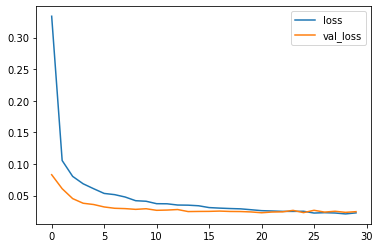

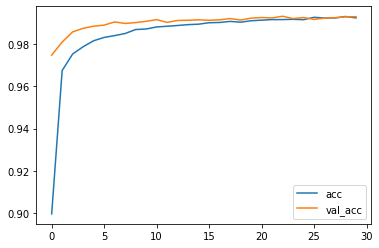

In [89]:
fit_and_plot(model, X_train_enc, y_train_enc, X_test_enc, y_test_enc, batch_size=128)